In [1]:
# import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

2022-06-17 10:02:42.018771: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [5]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 100
variables = ["i", "j", "REFL_COM_curr"]
data_list = []
for p, patch_file in enumerate(patch_files[0:num_files]):
    if p % 10 == 0:
        print(p, patch_file)
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
data = xr.concat(data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110625-0000_d01_model_patches.nc
90 /glade/scratch/lverhoef/WR

In [6]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length", "U_BUNK-potential_mean", "V_BUNK-potential_mean"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:num_files]):
    if p % 10 == 0:
        print(p, csv_file)
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
csv_data = xr.concat(csv_data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110625-0000.csv
90 /glade/scratch/lverhoef/WRF_all/tra

In [7]:
angles = np.arctan2(csv_data['V_BUNK-potential_mean'], csv_data['U_BUNK-potential_mean'])

(array([ 479.,  449.,  477.,  598.,  851., 1153., 1561., 2150., 2777.,
        3373., 4377., 5081., 3941., 2116.,  945.,  762.,  602.,  588.,
         550.,  573.]),
 array([-3.14136296e+00, -2.82722830e+00, -2.51309365e+00, -2.19895900e+00,
        -1.88482435e+00, -1.57068970e+00, -1.25655505e+00, -9.42420396e-01,
        -6.28285745e-01, -3.14151093e-01, -1.64418534e-05,  3.14118210e-01,
         6.28252861e-01,  9.42387512e-01,  1.25652216e+00,  1.57065681e+00,
         1.88479147e+00,  2.19892612e+00,  2.51306077e+00,  2.82719542e+00,
         3.14133007e+00]),
 <BarContainer object of 20 artists>)

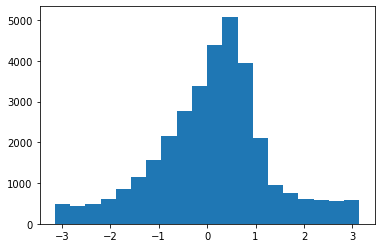

In [8]:
plt.hist(angles, bins=20)

In [9]:
np.percentile(abs(angles), 80)

1.451789493073867

In [10]:
np.pi/2

1.5707963267948966

In [11]:
temp = abs(angles) <= np.pi/2
temp.mean()

<xarray.DataArray 'V_BUNK-potential_mean' ()>
array(0.82253091)

In [12]:
# Create DataArrays for input and output data
input_data = data["REFL_COM_curr"].expand_dims("channel", axis=-1)
output_data = csv_data[["major_axis_length", "minor_axis_length"]].to_array().transpose()
del data
del csv_data

In [13]:
# Display shapes
print(input_data.shape)
print(output_data.shape)

(33403, 144, 144, 1)
(33403, 2)


In [14]:
# Find training indices so that training and validation data are from right-moving storms (angle is between -pi/2 and pi/2)
rng = np.random.default_rng()
train_val_indices = np.asarray(abs(angles) <= np.pi/2).nonzero()[0]
rng.shuffle(train_val_indices)
split_point = int(0.7 * input_data.shape[0])
train_indices = train_val_indices[:split_point]
val_indices = train_val_indices[split_point:]
test_indices = np.asarray(abs(angles) > np.pi/2).nonzero()[0]

In [15]:
# Normalize the training input data and actually evaluate the input_train array which will be fed into the network
input_train = input_data.values[train_indices]
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [16]:
# Normalize the validation data
input_val = input_data.values[val_indices]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [17]:
# Normalize the test input data and generate the test dataset
input_test = input_data.values[test_indices]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [18]:
# Split output into train, test, and validation sets
output_train = output_data[train_indices]
output_val = output_data[val_indices]
output_test = output_data[test_indices]

In [19]:
gdl_model = models.Sequential()
gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
gdl_model.add(GDL_layers.RotInvPool())
gdl_model.add(layers.Flatten())
gdl_model.add(layers.Dense(2))

2022-06-17 10:03:32.206551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-17 10:03:32.772696: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:89:00.0, compute capability: 7.0


In [20]:
gdl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d (RotEquivC  (None, 142, 142, 4, 32)  320       
 onv2D)                                                          
                                                                 
 rot_equiv_pool2d (RotEquivP  (None, 71, 71, 4, 32)    0         
 ool2D)                                                          
                                                                 
 rot_equiv_conv2d_1 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_1 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_2 (RotEqui  (None, 32, 32, 4, 64)    1

In [21]:
gdl_model.compile(
    optimizer='nadam',
    loss='mse'
)

In [22]:
gdl_history = gdl_model.fit(x=input_train_norm, y=output_train, epochs=10, validation_data=(input_val_norm, output_val))

Epoch 1/10


2022-06-17 10:03:39.941073: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


731/731 [==============================] - 63s 76ms/step - loss: 247.3157 - val_loss: 522.6857
Epoch 2/10
731/731 [==============================] - 56s 77ms/step - loss: 144.8739 - val_loss: 318.2336
Epoch 3/10
731/731 [==============================] - 55s 75ms/step - loss: 102.5335 - val_loss: 103.2992
Epoch 4/10
731/731 [==============================] - 55s 76ms/step - loss: 78.7389 - val_loss: 77.0083
Epoch 5/10
731/731 [==============================] - 56s 77ms/step - loss: 61.2503 - val_loss: 78.3134
Epoch 6/10
731/731 [==============================] - 56s 77ms/step - loss: 48.7146 - val_loss: 64.8156
Epoch 7/10
731/731 [==============================] - 56s 76ms/step - loss: 40.0216 - val_loss: 110.8576
Epoch 8/10
731/731 [==============================] - 54s 74ms/step - loss: 34.4117 - val_loss: 57.3871
Epoch 9/10
731/731 [==============================] - 55s 75ms/step - loss: 27.8432 - val_loss: 59.1670
Epoch 10/10
731/731 [==============================] - 55s 75ms/step

In [23]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(2))

In [24]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

In [25]:
cnn_model.compile(
    optimizer='nadam',
    loss='mse',
)

In [26]:
cnn_history = cnn_model.fit(x=input_train_norm, y=output_train, epochs=10, validation_data=(input_val_norm, output_val))

Epoch 1/10
731/731 [==============================] - 14s 17ms/step - loss: 255.5618 - val_loss: 293.7925
Epoch 2/10
731/731 [==============================] - 12s 16ms/step - loss: 176.8186 - val_loss: 173.3222
Epoch 3/10
731/731 [==============================] - 12s 16ms/step - loss: 138.3344 - val_loss: 140.9930
Epoch 4/10
731/731 [==============================] - 12s 16ms/step - loss: 107.6234 - val_loss: 111.2900
Epoch 5/10
731/731 [==============================] - 12s 16ms/step - loss: 85.6680 - val_loss: 90.8682
Epoch 6/10
731/731 [==============================] - 12s 17ms/step - loss: 73.3449 - val_loss: 102.7105
Epoch 7/10
731/731 [==============================] - 12s 16ms/step - loss: 60.8096 - val_loss: 82.7842
Epoch 8/10
731/731 [==============================] - 12s 16ms/step - loss: 51.8494 - val_loss: 75.1457
Epoch 9/10
731/731 [==============================] - 12s 16ms/step - loss: 44.6218 - val_loss: 73.0870
Epoch 10/10
731/731 [==============================] - 

(0.0, 306.5904209136963)

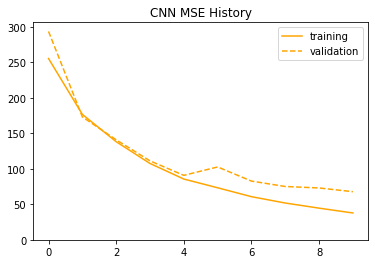

In [27]:
a = plt.plot(cnn_history.history['loss'], label='training', color='orange')
b = plt.plot(cnn_history.history['val_loss'], label='validation', color='orange', linestyle='dashed')
plt.legend()
plt.title("CNN MSE History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 547.6261256217956)

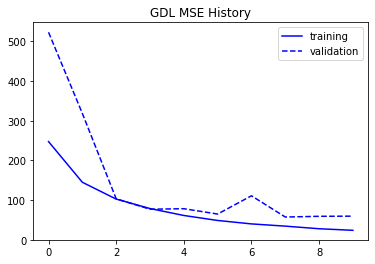

In [28]:
a = plt.plot(gdl_history.history['loss'], label='training', color='blue')
b = plt.plot(gdl_history.history['val_loss'], label='validation', color='blue', linestyle='dashed')
plt.legend()
plt.title("GDL MSE History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 267.14598112106324)

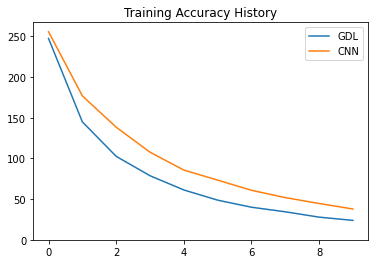

In [29]:
a = plt.plot(gdl_history.history['loss'], label='GDL')
b = plt.plot(cnn_history.history['loss'], label='CNN')
plt.legend()
plt.title("Training Accuracy History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 545.9506607055664)

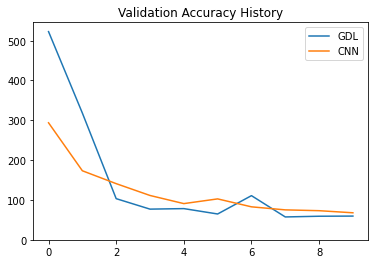

In [30]:
a = plt.plot(gdl_history.history['val_loss'], label='GDL')
b = plt.plot(cnn_history.history['val_loss'], label='CNN')
plt.title("Validation Accuracy History")
plt.legend()
ax = plt.gca()
ax.set_ylim(bottom=0)

In [31]:
gdl_model.evaluate(input_test_norm, output_test)

186/186 [==============================] - 4s 22ms/step - loss: 41.3252


41.325164794921875

In [32]:
cnn_model.evaluate(input_test_norm, output_test)

186/186 [==============================] - 1s 5ms/step - loss: 61.4897


61.489742279052734